In [1]:
import torch
from torch.nn import Linear, MSELoss
from torch.optim import SGD
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class LinRegPytorch():
    #initialization
    def __init__(self, epochs, lr, l1reg, l2reg):
        self.num_epochs= epochs
        self.learning_rate= lr
        self.l1_alpha= l1reg
        self.l2_lamda= l2reg
        self.model= None
        self.criterion= torch.nn.MSELoss()

    #model fitting
    def fit(self, X, y):
        self.x_train= X
        self.y_train=torch.tensor(y, dtype=torch.float32).view(-1, 1) #converting target to torch tensor
        self.input_size=X.shape[1]
        self.output_size=1 
        self.model= Linear(self.input_size,self.output_size) #linear model

        optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate, weight_decay= self.l2_lamda) #optimizer
        
        for epoch in range(self.num_epochs):
            outputs = self.model(self.x_train) #output predictions = tensor of shape n x 1 (ax+b value)
            loss= self.criterion(outputs, self.y_train) #loss calculation

            l1_reg= torch.tensor(0.) #initializing l1 regularization
            for param in self.model.parameters():
                l1_reg += torch.norm(param,1) #calculating l1 regularization
            loss += l1_reg * self.l1_alpha #adding l1 regularization to loss

            optimizer.zero_grad() #resetting gradients
            loss.backward() #calculating gradients
            optimizer.step() #updating weights

            #print loss per 5 epochs
            if (epoch+1) % 5 == 0:
                print(f'Epoch {epoch+1}/{self.num_epochs}, Loss: {loss.item()}')
                
                
    def print_equation(self):
        #print equation of regression
        weight = self.model.weight.detach().numpy()
        bias = self.model.bias.detach().numpy()
        equation = "y = "
        for i, w in enumerate(weight[0]):
            equation += f'{w} * x{i+1} + '
        equation += str(bias[0])
        print(equation)
        
        
    #prediction
    def predict(self, xtest):
        self.model.eval() #evaluation mode
        return self.model(xtest)

    #feature importance
    def plot_feature_importance(self, feature_names):
        weights = self.model.weight.detach() #weights
        importance = weights.abs().tolist()[0] #absolute value of weights
        plt.figure(figsize=(10, 5))
        plt.bar(feature_names, importance)
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.title('Feature Importance')
        plt.show()



Epoch 5/60, Loss: 5.470411777496338
Epoch 10/60, Loss: 5.370304107666016
Epoch 15/60, Loss: 5.272401332855225
Epoch 20/60, Loss: 5.176649570465088
Epoch 25/60, Loss: 5.082998275756836
Epoch 30/60, Loss: 4.991396903991699
Epoch 35/60, Loss: 4.901797771453857
Epoch 40/60, Loss: 4.814154148101807
Epoch 45/60, Loss: 4.728417873382568
Epoch 50/60, Loss: 4.644546031951904
Epoch 55/60, Loss: 4.562494277954102
Epoch 60/60, Loss: 4.482219696044922
y = -0.05321735516190529 * x1 + -0.18106335401535034 * x2 + 0.2346329540014267 * x3 + -0.13800960779190063 * x4 + -0.1664518564939499 * x5 + 0.23374135792255402 * x6 + 0.1429307609796524 * x7 + -0.2380492091178894 * x8 + 0.39920843


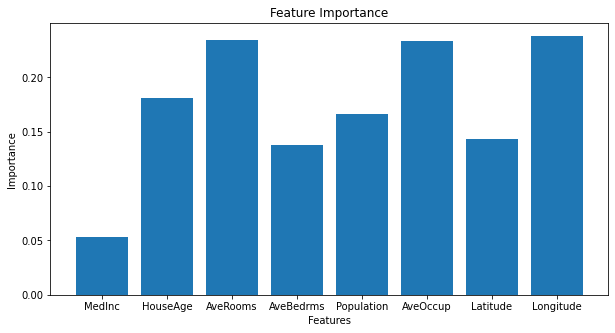

Mean Squared Error is: 4.3080387558617135
On average, the model's predictions are off by about $207558.1546425414


In [3]:
california = fetch_california_housing()
X = california.data
y = california.target

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the data
mean = torch.mean(torch.tensor(X, dtype=torch.float32), axis=0)
std = torch.std(torch.tensor(X, dtype=torch.float32), axis=0)
X_train = (torch.tensor(X_train, dtype=torch.float32) - mean) / std  
X_test = (torch.tensor(X_test, dtype=torch.float32) - mean) / std


        
        
#model initialization and fitting
pt_model= LinRegPytorch(epochs= 60, lr= 0.001, l1reg= 0.005, l2reg=0.005)
pt_model.fit(X_train,y_train)
#printing model equation
pt_model.print_equation()

#feature importance plot
feature_names = california.feature_names
pt_model.plot_feature_importance(feature_names)

#predictions
y_pred = pt_model.predict(X_test)

#mse calculation
mse = torch.mean(torch.square(torch.tensor(y_test) - y_pred))
print(f'Mean Squared Error is: {mse}')

#rmse calculation
rmse = torch.sqrt(torch.mean(torch.square(torch.tensor(y_test) - y_pred)))
rmse_in_dollars = rmse * 100000

print(f"On average, the model's predictions are off by about ${rmse_in_dollars}")
